In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
sns.set()

In [2]:
df1=pd.read_csv("Data.csv")

In [3]:
df1.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
df1.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
type(df1)

pandas.core.frame.DataFrame

In [6]:
df1.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [7]:
df1.shape

(10, 4)

In [8]:
df1.size

40

In [9]:
X = df1.iloc[:,0:3].values
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [10]:
#Handling Missing values  #Numerical data
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=5)
imputer1.fit(X[:,1:3])
X[:, 1:3] = imputer1.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 5]
 ['France' 35.0 58000.0]
 ['Spain' 5 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [11]:
#Handling Missing values  #Numerical data
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer1.fit(X[:,1:3])
X[:, 1:3] = imputer1.transform(X[:,1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 5.0]
 ['France' 35.0 58000.0]
 ['Spain' 5.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


#  Categorical Data

LabelEncoder can be used to normalize labels It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

In [35]:
#Handling categorical data
# label Encoding #dependent variable Purchased
Y = df1.iloc[:,0].values
print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)

['France' 'Spain' 'Germany' 'Spain' 'Germany' 'France' 'Spain' 'France'
 'Germany' 'France']
[0 2 1 2 1 0 2 0 1 0]


In [17]:
#Handling categorical data
# label Encoding #dependent variable Purchased
Y = df1.iloc[:,3].values
print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)


['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [18]:
#Handling categorical data
# OneHot Encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 5.0]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 5.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


# OneHot Encoding

In [19]:
#Handling categorical data
# OneHot Encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 1.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 0.0 1.0 30.0 54000.0]
 [0.0 1.0 0.0 0.0 38.0 61000.0]
 [1.0 0.0 0.0 1.0 40.0 5.0]
 [1.0 0.0 1.0 0.0 35.0 58000.0]
 [0.0 1.0 0.0 0.0 5.0 52000.0]
 [1.0 0.0 1.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 1.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 37.0 67000.0]]


In [24]:
#Split the dataset into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print("\n X_train")
print(X_train)
print("\n Y_train")
print(Y_train)
print("\n X_test")
print(X_test)
print("\n Y_test")
print(Y_test)



 X_train
[[0.0 1.0 0.0 0.0 5.0 52000.0]
 [1.0 0.0 0.0 1.0 40.0 5.0]
 [1.0 0.0 1.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 38.0 61000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 1.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 35.0 58000.0]]

 Y_train
[0 1 0 0 1 1 0 1]

 X_test
[[1.0 0.0 0.0 1.0 30.0 54000.0]
 [1.0 0.0 1.0 0.0 37.0 67000.0]]

 Y_test
[0 1]


In [25]:
X_train.shape

(8, 6)

In [26]:
X_test.shape

(2, 6)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
print(X_train)
X_test[:, 3:] = sc.transform(X_test[:, 3:])

[[0.0 1.0 0.0 -0.5773502691896258 -2.280107936658285 -0.18972565207463857]
 [1.0 0.0 0.0 1.7320508075688774 0.30462980530252387 -2.322364004647714]
 [1.0 0.0 1.0 -0.5773502691896258 0.6000284043837592 0.6305987454916949]
 [0.0 1.0 0.0 -0.5773502691896258 0.15693050576190623 0.1794203268302115]
 [0.0 1.0 0.0 -0.5773502691896258 -0.6554156417114907 -0.3537905315879053]
 [1.0 0.0 1.0 -0.5773502691896258 0.8954270034649944 0.9177122846399117]
 [1.0 0.0 0.0 1.7320508075688774 1.043126303005612 1.0817771641531784]
 [1.0 0.0 1.0 -0.5773502691896258 -0.06461844354902022
  0.05637166719526148]]


In [28]:
#Split the dataset into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print("\n")
print(X_train)
print("\n")



[[0.0 1.0 0.0 0.0 5.0 52000.0]
 [1.0 0.0 0.0 1.0 40.0 5.0]
 [1.0 0.0 1.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 38.0 61000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 1.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 35.0 58000.0]]




#  Matplotlib

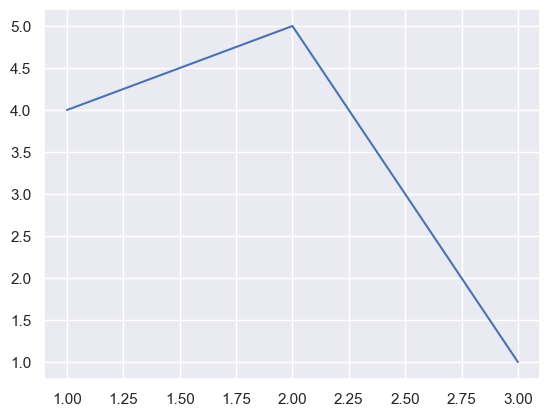

In [29]:
#line chart or linear plot
from matplotlib import pyplot as plt
plt.plot([1,2,3],[4,5,1])
plt.show()

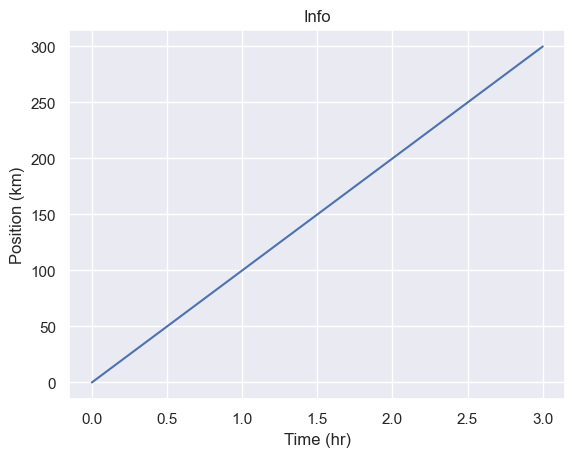

In [30]:
#line Chart
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position)
plt.title('Info')
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()


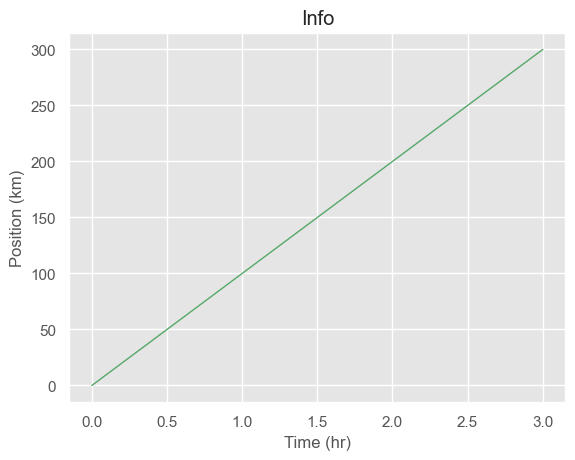

In [31]:
#line chart with grids
from matplotlib import style 
style.use('ggplot')
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position,'g',label='line2', linewidth=1)
plt.title('Info')
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
#plt.legend()
#plt.grid(True,color='k')
plt.show()

<BarContainer object of 4 artists>

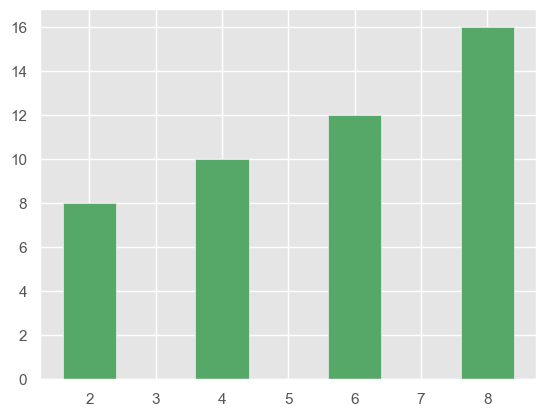

In [32]:
#Bar plot, Bar plots are used to compare categorical values. likes GDP of each city of a country
plt.bar([2,4,6,8],[8,10,12,16], label='example1',color='g')

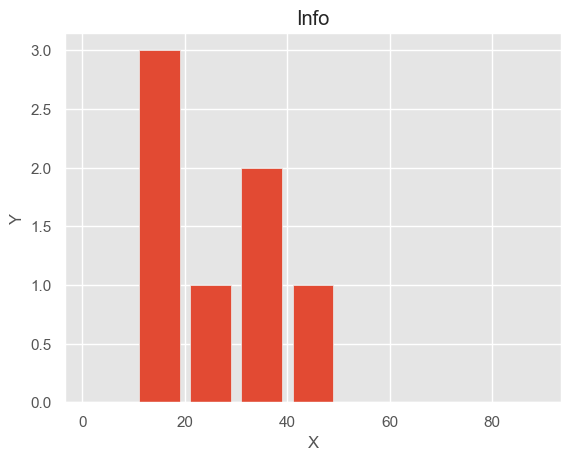

In [33]:
#Histogram plot. Histrograms are used to compare quantitative variables. Like Age groups.
population_ages=[10,20,30,35,40,15,112,115,16,190,200]
bins=[0,10,20,30,40,50,60,70,80,90]
plt.hist(population_ages,bins, histtype='bar',rwidth=0.8)
plt.title('Info')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


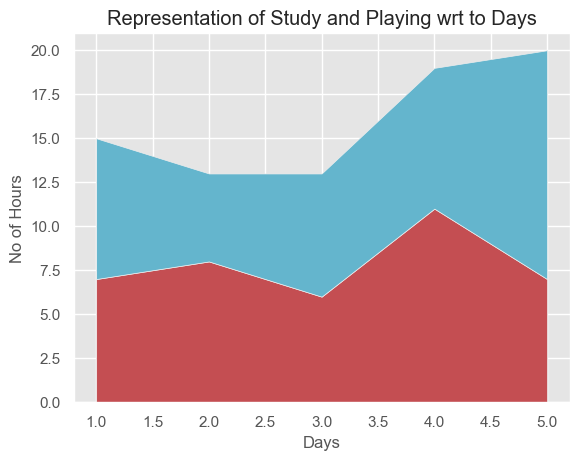

In [34]:
#Stackplot. To track changes over time in two or more relative group which make up a single category. 
# List of Days
days = [1, 2, 3, 4, 5]
  
# No of Study Hours
Studying = [7, 8, 6, 11, 7]
  
# No of Playing Hours
playing =  [8, 5, 7, 8, 13]
  
# Stackplot with X, Y, colors value
plt.stackplot(days, Studying, playing,
              colors =['r', 'c'])
# Days
plt.xlabel('Days')
  
# No of hours
plt.ylabel('No of Hours')
  
# Title of Graph
plt.title('Representation of Study and \
Playing wrt to Days')
  
# Displaying Graph
plt.show()